In [1]:
import numpy as np
import pandas as pd
df_sample=pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\sample.csv")

In [2]:
df_sample = df_sample.reset_index(drop=True)

In [3]:
df_sample.shape

(700000, 11)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['type'])
label
df_sample.drop("type", axis=1, inplace=True)
df_sample["type"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameDest'])
label
df_sample.drop("nameDest", axis=1, inplace=True)
df_sample["nameDest"] = label

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df_sample['nameOrig'])
label
df_sample.drop("nameOrig", axis=1, inplace=True)
df_sample["nameOrig"] = label

In [5]:
from sklearn.model_selection import train_test_split

X = df_sample.drop('isFraud', axis=1)
# Separate the target variable
y = df_sample['isFraud']

In [6]:
from imblearn.over_sampling import SMOTE

#Upsampling via SMOTE
smote = SMOTE(sampling_strategy=0.55, random_state=0)

# Fit and apply the resampler to the entire dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [7]:
# from sklearn.model_selection import train_test_split

# X = df_sample.drop('isFraud', axis=1)
# # Separate the target variable
# y = df_sample['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, stratify=y_resampled, random_state=2)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998743
1    0.001257
Name: isFraud, dtype: float64
0    0.645162
1    0.354838
Name: isFraud, dtype: float64
0    0.645159
1    0.354841
Name: isFraud, dtype: float64


In [ ]:
import numpy as np

unique, counts = np.unique(y, return_counts=True)
print("Count of 0s: ", counts[0])
print("Count of 1s: ", counts[1])

In [ ]:
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# #Upsampling via SMOTE
# smote = SMOTE(sampling_strategy=0.2, random_state=0)

# #Downsample via RandomUnderSampler
# rus = RandomUnderSampler(sampling_strategy=0.4, random_state=0)

# #Application of the resampling methods
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
# X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

In [9]:
from imblearn.under_sampling import TomekLinks

#Resample using TomekLinks first
tomek_links = TomekLinks(sampling_strategy='majority')
X_train_resampled, y_train_resampled = tomek_links.fit_resample(X_train, y_train)

In [10]:
from imblearn.under_sampling import TomekLinks, EditedNearestNeighbours,OneSidedSelection
# resample the output of TomekLinks using EditedNearestNeighbours
enn = EditedNearestNeighbours(sampling_strategy='majority')
X_train_resampled_new, y_train_resampled_new = enn.fit_resample(X_train_resampled, y_train_resampled)

In [11]:
from imblearn.under_sampling import OneSidedSelection
# resample the output of EditedNearestNeighbours using One-Sided Selection
oss = OneSidedSelection(sampling_strategy='majority')
X_train_resampled_final, y_train_resampled_final = oss.fit_resample(X_train_resampled_new, y_train_resampled_new)

In [12]:
# import the necessary libraries
import pandas as pd
import numpy as np
# convert X_test to a pandas dataframe
X_test = pd.DataFrame(X_test, columns=X_train.columns)
# define a function to replace outliers with MAD for a single column
def replace_outliers_with_mad(column):
    median = np.median(column)
    mad = np.median(np.abs(column - median))
    threshold = 2.5 * mad
    column[np.abs(column - median) > threshold] = median
    return column

# apply the function to all columns of X_train_resampled_final
for i in range(X_train_resampled_final.shape[1]):
    X_train_resampled_final.iloc[:, i] = replace_outliers_with_mad(X_train_resampled_final.iloc[:, i])

# apply the function to all columns of X_test
for i in range(X_test.shape[1]):
    X_test.iloc[:, i] = replace_outliers_with_mad(X_test.iloc[:, i])

# convert the numpy arrays back to pandas dataframes
X_train_resampled_final = pd.DataFrame(X_train_resampled_final, columns=X_train.columns)
X_test = pd.DataFrame(X_test, columns=X_test.columns)

# print the modified dataframes
print(X_train_resampled_final)
print(X_test)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


        step         amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0        230   21730.530000   21069.000000             0.0        0.000000   
1        299  153287.571152       0.000000             0.0    48032.732913   
2        214   40082.480000   75685.200439             0.0    54532.410000   
3        229   72769.580000   43166.000000             0.0        0.000000   
4        284   19306.770000       0.000000             0.0        0.000000   
...      ...            ...            ...             ...             ...   
914981   124  153287.571152   75685.200439             0.0        0.000000   
914982   282  141996.285548  141996.285548             0.0   128838.062662   
914983   305  153287.571152   75685.200439             0.0    28465.618106   
914984   435  341707.785915   75685.200439             0.0    48032.732913   
914985   486  153287.571152   75685.200439             0.0        0.000000   

        newbalanceDest  isFlaggedFraud  type  nameDest  nameOri

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\23059\anaconda3\envs\test2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [13]:
# import module
from sklearn.preprocessing import StandardScaler

# compute required values
scaler = StandardScaler()
model = scaler.fit(X_train_resampled_final)
X_train_resampled_final = model.transform(X_train_resampled_final)

In [14]:
# compute required values
scaler = StandardScaler()
model = scaler.fit(X_test)
X_test = model.transform(X_test)

In [1]:
# from bayes_opt import BayesianOptimization
# from keras.layers import Input, Dense
# from keras.models import Model
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# from keras.callbacks import EarlyStopping

# # Define the autoencoder model
# def create_autoencoder(encoding_dim, batch_size, learning_rate, patience, l1_reg):
#     input_layer = Input(shape=(10,))
#     hidden_layer = Dense(encoding_dim, activation='relu', activity_regularizer='l1', kernel_regularizer='l1')(input_layer)
#     output_layer = Dense(10, activation='sigmoid')(hidden_layer)
#     autoencoder = Model(inputs=input_layer, outputs=output_layer)
#     autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
#     autoencoder.fit(X_train_resampled_final, X_train_resampled_final, epochs=1, batch_size=int(batch_size), validation_data=(X_test, X_test), callbacks=[EarlyStopping(monitor='val_loss', patience=int(patience), mode='min')])
#     reconstruction_loss = autoencoder.evaluate(X_test, X_test, verbose=0)
#     return -reconstruction_loss

# # Define the search space for the hyperparameters
# search_space = {
#     'encoding_dim': (10, 50),
#     'batch_size': (32, 128),
#     'learning_rate': (-5, -1),
#     'patience': (1, 10),
#     'l1_reg': (0, 0.1),
# }

# # Create a BayesianOptimization optimizer and optimize the function defined above
# optimizer = BayesianOptimization(
#     f=create_autoencoder,
#     pbounds=search_space,
#     random_state=42,
#     verbose=1
# )

# optimizer.maximize(n_iter=10, init_points=2)

# # Get the best hyperparameters
# best_encoding_dim = int(optimizer.max['params']['encoding_dim'])
# best_batch_size = int(optimizer.max['params']['batch_size'])
# best_learning_rate = optimizer.max['params']['learning_rate']
# best_patience = int(optimizer.max['params']['patience'])
# best_l1_reg = optimizer.max['params']['l1_reg']

# # Train the autoencoder model using the best hyperparameters
# best_autoencoder = create_autoencoder(best_encoding_dim, best_batch_size, best_learning_rate, best_patience, best_l1_reg)

In [ ]:
from bayes_opt import BayesianOptimization
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import time

# Define the autoencoder model
def create_autoencoder(encoding_dim, batch_size, learning_rate, patience, l1_reg):
    input_layer = Input(shape=(10,))
    hidden_layer = Dense(encoding_dim, activation='relu', activity_regularizer='l1', kernel_regularizer='l1')(input_layer)
    output_layer = Dense(10, activation='sigmoid')(hidden_layer)
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    val_losses = []
    for train_index, val_index in kf.split(X_train_resampled_final):
        X_train, X_val = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
        es = EarlyStopping(monitor='val_loss', patience=patience, mode='min')
        autoencoder.fit(X_train, X_train, epochs=5, batch_size=int(batch_size), validation_data=(X_val, X_val), callbacks=[es])
        val_losses.append(autoencoder.evaluate(X_val, X_val))
    return np.mean(val_losses)

# Define the search space for the hyperparameters
search_space = {
    'encoding_dim': (10, 50),
    'batch_size': (32, 128),
    'learning_rate': (-5, -1),
    'patience': (1, 10),
    'l1_reg': (0, 0.1),
}

# Create a BayesianOptimization optimizer and optimize the function defined above
optimizer = BayesianOptimization(
    f=create_autoencoder,
    pbounds=search_space,
    random_state=42,
    verbose=1
)

start_time = time.time()
optimizer.maximize(n_iter=3, init_points=2)
end_time = time.time()

# Get the best hyperparameters
best_encoding_dim = int(optimizer.max['params']['encoding_dim'])
best_batch_size = int(optimizer.max['params']['batch_size'])
best_learning_rate = optimizer.max['params']['learning_rate']
best_patience = int(optimizer.max['params']['patience'])
best_l1_reg = optimizer.max['params']['l1_reg']

# Print the best hyperparameters and the time taken by the algorithm
print('Best hyperparameters:')
print(f'Encoding dim: {best_encoding_dim}')
print(f'Batch size: {best_batch_size}')
print(f'Learning rate: {best_learning_rate}')
print(f'Patience: {best_patience}')
print(f'L1 reg: {best_l1_reg}')
print(f'Time taken: {end_time - start_time:.2f} seconds')

In [ ]:
print(f"Best hyperparameters: Encoding dim: {best_encoding_dim}, Batch size: {best_batch_size}, Learning rate: {best_learning_rate}, Patience: {best_patience}, L1 reg: {best_l1_reg}\n")

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7862/7900 [============================>.] - ETA: 0s - loss: 0.4089WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D7329F1318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

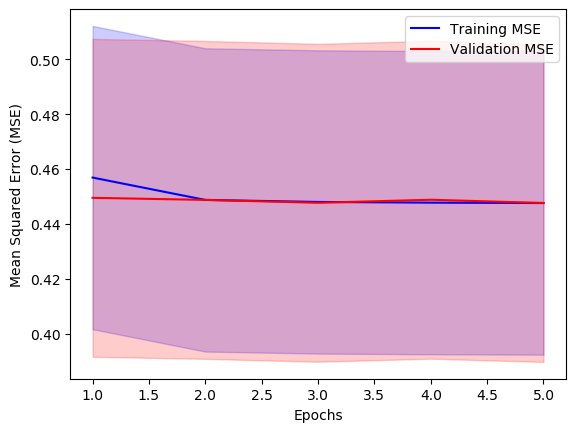

In [13]:
import numpy as np
from keras.models import Model
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input, Dense

# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 15
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
hidden_layer = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l1(0.0033827404209811787))(input_layer)
output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate
opt = Adam(lr= 0.00818356134505909)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder model with the specified optimizer and loss function
autoencoder.compile(optimizer=opt, loss='mse')

import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []

# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    # Define early stopping to prevent overfitting and improve efficiency
    early_stopping = EarlyStopping(monitor='val_loss', patience=8)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=5,batch_size=64, verbose=1, validation_data=(X_val_fold, X_val_fold),callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)
mean_val_mse = np.mean(val_mse, axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)

# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
# plt.fill_between(epochs, mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.fill_between(range(1, len(mean_train_mse)+1), mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(range(1, len(mean_val_mse)+1), mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from keras.models import Model
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Input, Dense
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)

# Define the autoencoder architecture
input_dim = X_train_resampled_final.shape[1]
encoding_dim = 42
decoding_dim = 10

input_layer = Input(shape=(input_dim,))
hidden_layer = Dense(encoding_dim, activation='relu', kernel_regularizer=regularizers.l1(0.1))(input_layer)
output_layer = Dense(decoding_dim, activation='sigmoid')(hidden_layer)

# Define the optimizer with the desired learning rate
opt = Adam(lr= 0.1)

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the autoencoder model with the specified optimizer and loss function
autoencoder.compile(optimizer=opt, loss='mse')

# Define the number of folds for cross-validation
n_splits = 2
kf = KFold(n_splits=n_splits)

# Define lists to store the MSE of training and validation sets for each fold
train_mse = []
val_mse = []
test_mse = []
recon_errors = []

# Loop over each fold
for train_index, val_index in kf.split(X_train_resampled_final):
    
    # Split the data into training and validation sets for the current fold
    X_train_fold, X_val_fold = X_train_resampled_final[train_index], X_train_resampled_final[val_index]
    
    # Define early stopping to prevent overfitting and improve efficiency
    early_stopping = EarlyStopping(monitor='val_loss', patience=8)

    # Fit the autoencoder on the training set for the current fold
    history = autoencoder.fit(X_train_fold, X_train_fold, epochs=30, batch_size=64, verbose=1, validation_data=(X_val_fold, X_val_fold), callbacks=[early_stopping])
    
    # Append the MSE of training and validation sets for the current fold to the lists
    train_mse.append(history.history['loss'])
    val_mse.append(history.history['val_loss'])
    
    # compute the reconstruction error for the test data
    recon_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    recon_errors.append(recon_error)
    
    # Calculate the MSE for the test set
    test_error = autoencoder.evaluate(X_test, X_test, verbose=0)
    test_mse.append(test_error)
    print(f"Test MSE: {test_error:.5f}")

# Calculate the mean and standard deviation of MSE for training and validation sets across all folds
mean_train_mse = np.mean(train_mse, axis=0)
std_train_mse = np.std(np.concatenate(train_mse), axis=0)
mean_val_mse = np.mean(val_mse, axis=0)
std_val_mse = np.std(np.concatenate(val_mse), axis=0)

# Plot the MSE of training and validation sets against the number of epochs
epochs = range(1, len(mean_train_mse)+1)
plt.plot(epochs, mean_train_mse, 'b', label='Training MSE')
plt.fill_between(range(1, len(mean_train_mse)+1), mean_train_mse - std_train_mse, mean_train_mse + std_train_mse, alpha=0.2, color='b')
plt.plot(epochs, mean_val_mse, 'r', label='Validation MSE')
plt.fill_between(range(1, len(mean_val_mse)+1), mean_val_mse - std_val_mse, mean_val_mse + std_val_mse, alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.xlim([1,30]) # set the x-axis limit to show only up to 30 epochs
plt.show()

In [ ]:
# Assuming you have two lists, one for the training MSE and one for the test MSE, for each epoch
train_mse = [0.1, 0.05, 0.03, 0.02, 0.015, 0.012, 0.01, 0.008, 0.007, 0.006, 0.005, 0.004, 0.0035, 0.003, 0.0028, 0.0026, 0.0025, 0.0023, 0.0022, 0.0021]
test_mse = [0.15, 0.12, 0.1, 0.09, 0.08, 0.075, 0.072, 0.07, 0.068, 0.065, 0.063, 0.062, 0.061, 0.06, 0.059, 0.058, 0.057, 0.056, 0.055, 0.054]
epochs = range(1, len(train_mse)+1)

plt.plot(epochs, train_mse, 'b', label='Training MSE')
plt.fill_between(range(1, len(train_mse)+1), [x - 0.01 for x in train_mse], [x + 0.01 for x in train_mse], alpha=0.2, color='b')
plt.plot(epochs, test_mse, 'r', label='Test MSE')
plt.fill_between(range(1, len(test_mse)+1), [x - 0.01 for x in test_mse], [x + 0.01 for x in test_mse], alpha=0.2, color='r')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.xlim([1,20]) # set the x-axis limit to show only up to 20 epochs
plt.show()

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.model_selection import KFold
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import regularizers

input_dim = X_train_resampled_final.shape[1]

space = {
    'encoding_dim': hp.quniform('encoding_dim', 10, 50, 1),
    'batch_size': hp.choice('batch_size', [32, 64, 128]),
    'learning_rate': hp.loguniform('learning_rate', -5, -1),
    'patience': hp.quniform('patience', 1, 10, 1),
    'l1_reg': hp.uniform('l1_reg', 0, 0.1),
    'activation': hp.choice('activation', ['relu', 'sigmoid', 'tanh']),
    'epochs': hp.quniform('epochs', 10, 30, 1)
}

def optimize(params):
    encoding_dim = int(params['encoding_dim'])
    batch_size = params['batch_size']
    learning_rate = params['learning_rate']
    patience = int(params['patience'])
    l1_reg = params['l1_reg']
    activation = params['activation']
    epochs=int(params['epochs'])
   
    # Define autoencoder architecture
    input_dim = X_train_resampled_final.shape[1]
    input_layer = Input(shape=(input_dim,))
    hidden_layer = Dense(encoding_dim, activation=activation, activity_regularizer=regularizers.l1(l1_reg))(input_layer)
    output_layer = Dense(input_dim, activation='sigmoid')(hidden_layer)
    autoencoder = Model(inputs=input_layer, outputs=output_layer)
    autoencoder.compile(optimizer=Adam(lr=learning_rate), loss='mse')

    # Define cross-validation parameters
    kf = KFold(n_splits=2, shuffle=True, random_state=42)

    losses = []

    # Train and evaluate model using cross-validation
    for train_idx, val_idx in kf.split(X_train_resampled_final):
        # Split data into training and validation sets
        train_data, val_data = X_train_resampled_final[train_idx], X_train_resampled_final[val_idx]

        # Train model
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True)
        autoencoder.fit(train_data, train_data, epochs=epochs, batch_size=batch_size, validation_data=(val_data, val_data), verbose=0, callbacks=[early_stopping])

        # Evaluate model
        val_loss = autoencoder.evaluate(val_data, val_data, verbose=0)
        losses.append(val_loss)

    # Calculate mean validation loss across folds
    mean_loss = np.mean(losses)

    return {'loss': mean_loss, 'status': STATUS_OK}

# Run hyperparameter optimization
best = fmin(fn=optimize, space=space, algo=tpe.suggest, max_evals=5)

print("Best hyperparameters:", best)

In [14]:
# Define the hidden layer model
hidden_layer_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train = hidden_layer_model.predict(X_train_resampled_final)

# Define a new model that takes the output of the hidden layer as input
new_model_input = Input(shape=(hidden_layer_output_train.shape[1],))
x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.000111))(new_model_input)
# x = Dense(32, activation='relu')(x)
output = Dense(2, activation='sigmoid')(x)
#output = Dense(1, activation='softmax')(x)
mediator_network = Model(inputs=new_model_input, outputs=output)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
31600/31600 [==============================] - 30s 948us/step


In [15]:
from keras.utils import to_categorical

# Convert target labels to one-hot encoded format
y_train_resampled_final_onehot = to_categorical(y_train_resampled_final)

In [16]:
opt_new = Adam(lr= 0.000992)

C:\Users\23059\anaconda3\envs\test2\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Compile the new model
mediator_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# Train the new model on the activations of the hidden layer
history = mediator_network.fit(hidden_layer_output_train, y_train_resampled_final_onehot,
                               epochs=15, batch_size=32, validation_split=0.1,
                               callbacks=[early_stopping])

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
28413/28440 [============================>.] - ETA: 0s - loss: 0.4423WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001D7324E5678> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach th

In [ ]:
# Define the hidden layer model
hidden_layer_model_med = Model(inputs=mediator_network .input, outputs=mediator_network .layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# # Define a new model that takes the output of the hidden layer as input
# new_model_input_med = Input(shape=(hidden_layer_output_train_med.shape[1],))

# x = Dense(10, activation='tanh',kernel_regularizer=regularizers.l1(0.0000611))(new_model_input_med)

# output_med = Dense(2, activation='sigmoid')(x)

# agent_network = Model(inputs=new_model_input_med, outputs=output_med)

In [ ]:
# from keras.callbacks import EarlyStopping

# # Define the early stopping callback
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# agent_network.compile(optimizer=opt_new, loss='binary_crossentropy')

# # Train the new model on the activations of the hidden layer
# history = agent_network.fit(hidden_layer_output_train_med, y_train_resampled_final_onehot,
#                                epochs=10, batch_size=32, validation_split=0.2,
#                                callbacks=[early_stopping],verbose=0)

In [ ]:
# Import required libraries
import numpy as np
import random
from tensorflow import keras

# Import necessary libraries
import random
import numpy as np

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 32
num_episodes = 15
max_steps = 7
learning_rate=0.5

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize experience replay memory
M = 20000
replay_memory = []

# Define epsilon-greedy policy
def epsilon_greedy_policy(state, epsilon, theta):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 1)
    else:
        Q_values = Q(state, theta)
        return np.argmax(Q_values)

# Define Q-network
# def agent_network(state_shape, num_actions):
#     inputs = keras.layers.Input(shape=state_shape)
#     x = keras.layers.Dense(32, activation='relu')(inputs)
#     x = keras.layers.Dense(32, activation='relu')(x)
#     outputs = keras.layers.Dense(num_actions)(x)
#     model = keras.models.Model(inputs=inputs, outputs=outputs)
#     return model

def agent_network(state_shape, num_actions):
    inputs = keras.layers.Input(shape=(1,))
    x = keras.layers.Dense(10, activation='tanh')(inputs)
    outputs = keras.layers.Dense(num_actions)(x)
    return keras.Model(inputs=inputs, outputs=outputs)


# Define Q function
def Q(state, theta):
    return agent_network(state.shape, 2)(state.reshape(1, -1)).numpy()[0]


# Define loss function
def compute_loss(target_Q_values, predicted_Q_values):
    return np.mean(np.square(target_Q_values - predicted_Q_values))

# Define reward function
def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    if action == 1:
        reward = true_label * (predicted_label - lambda_val) - (1 - true_label) * (predicted_label + lambda_val)
    else:
        reward = (1 - true_label) * (predicted_label - lambda_val) - true_label * (predicted_label + lambda_val)
    return reward, int(predicted_label == true_label)

# Define hyperparameters
num_episodes = 10
max_steps = 20
epsilon = 0.1
gamma = 0.99
batch_size = 32
learning_rate = 0.001

# Initialize simulation environments
environments = [epsilon for i in range(num_episodes)]

# Initialize Q-network parameters
num_features = D[0][0].shape[0]
num_actions = 2
model = agent_network(num_features, num_actions)
theta = model.get_weights()

# Initialize index counter for hidden_layer_output_train_med
idx = 0

# Start training
for episode in range(num_episodes):
    
    # Shuffle training data
    random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state= hidden_layer_output_train_med[0, 0]
    
    # Start episode
    for step in range(max_steps):
        action = epsilon_greedy_policy(state, epsilon, theta)
        true_label = D[step][1]
        predicted_label = action

        # Get next state from hidden_layer_output_train_med
        next_state = hidden_layer_output_train_med[idx, 0]
        idx += 1

        reward, terminal = reward_fn(action, true_label, predicted_label, lambda_val=0.1)
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], model)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Convert states and next_states tuples into numpy arrays
            states = np.array(states)
            next_states = np.array(next_states)

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, model)[np.arange(batch_size), actions.astype(int)]
            target_Q_values = np.array(target_Q_values)
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Backpropagation
            with tf.GradientTape() as tape:
                tape.watch(model.trainable_variables)
                predictions = Q(states, model)
                loss = compute_loss(target_Q_values, predictions[np.arange(batch_size), actions.astype(int)])
            gradients = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        # Update state
        state = next_state

        # Check if episode is finished
        if terminal==1:
            break
        
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
import random
import numpy as np
import tensorflow as tf

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
batch_size = 128
num_episodes = 15
max_steps = 7
learning_rate = 0.5

replay_memory_size = 20000
num_features = D[0][0].shape[0]

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = epsilon

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape
num_actions = 2

# Define Q-network

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

model= keras.Model(inputs=new_model_input_med, outputs=output_med)

# Compile your Keras model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = model(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = model.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Reshape the state array to match the expected size
    #state = np.reshape(state, (batch_size, num_features))
    
    #state = np.stack(states, axis=0)
    #state = np.array(state)
    #state = np.reshape(state, (batch_size, num_features))
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute predicted Q-values and loss
            predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
            loss = compute_loss(target_Q_values, predicted_Q_values)

            # Compute gradients
            grad = np.gradient(loss, np.ravel(theta.T), axis=2)

            # Reshape gradients to match the shape of theta
            grad = grad.reshape(theta.shape)

            # Update parameters using gradient descent
            theta -= grad * learning_rate
        
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

In [ ]:
# import random
# import numpy as np
# import tensorflow as tf

# # Define hyperparameters
# gamma = 0.85
# epsilon = 0.1
# batch_size = 128
# num_episodes = 30
# max_steps = 7
# learning_rate = 0.5

# replay_memory_size = 20000
# num_features = D[0][0].shape[0]

# D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# # Initialize counters for true positives, true negatives, false positives, and false negatives
# tp = 0
# tn = 0
# fp = 0
# fn = 0

# # Initialize simulation environment
# environment = epsilon

# theta = np.zeros((num_features, num_actions))

# # Define Q-network
# input_shape = hidden_layer_output_train_med[0].shape
# num_actions = 2

# # Define Q-network

# # Define the hidden layer model
# hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
#                                             outputs=mediator_network.layers[1].output)

# # Get the activations of the hidden layer for the training data
# hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# # Define a new model that takes the output of the hidden layer as input
# new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
# reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

# x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

# output_med = keras.layers.Dense(2, activation='sigmoid')(x)

# agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

# opt_new=Adam(lr=0.00517)

# # Compile your Keras model
# agent_network.compile(optimizer='opt_new',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # Initialize replay memory
# replay_memory = []

# def Q(state, theta):
#     # Convert state to numpy array
#     state = np.array(state)
    
#     # Reshape state to (1, num_features)
#     state = np.reshape(state, (1, -1))
    
#     # Compute Q-values using the network
#     Q_values = agent_network(state).numpy()[0]
#     return Q_values


# def epsilon_greedy_policy(state, epsilon, model):
#     if np.random.uniform() < epsilon:
#         # Choose a random action
#         action = np.random.randint(num_actions)
#     else:
#         # Choose the action with the highest Q-value
#         Q_values = agent_network.predict(state[np.newaxis])[0]
#         action = np.argmax(Q_values)
#     return action

# def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
#     # Initialize terminal flag
#     terminal = 0
#     # Fraud class
#     if true_label == 1:
#         if action == true_label:
#             reward = 1
#         else:
#             reward = -1
#             terminal = 1
#     # Not fraud class
#     else:
#         if action == true_label:
#             reward = lambda_val
#         else:
#             reward = -lambda_val
#     return reward, terminal

# # Define function for computing loss
# def compute_loss(y, Q_values):
#     return tf.reduce_mean(tf.square(y - Q_values))

# # Start training
# for episode in range(num_episodes):
#     # Shuffle training data
#     np.random.shuffle(D)
#     print("Episode ", episode)
#     print("--------------------------------------------")
    
#     # Initialize state
#     state = hidden_layer_output_train_med[0]
    
#     # Start episode
#     for step in range(max_steps):
#         # Choose action
#         action = epsilon_greedy_policy(state, epsilon, model)
        
#         # Get true label
#         true_label = D[step][1]
        
#         # Predict label
#         predicted_label = action
        
#         # Get next state
#         next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
#         # Calculate reward and terminal flag
#         reward, terminal = reward_fn(action, true_label, predicted_label)
        
#         print("Step:", step)
#         print("True label is", true_label, ". Agent has predicted:", predicted_label)
#         print("Reward:", reward)
#         print("")
        
#         # Update counters for precision and accuracy
#         if true_label == 1:
#             if predicted_label == 1:
#                 tp += 1
#             else:
#                 fn += 1
#         else:
#             if predicted_label == 1:
#                 fp += 1
#             else:
#                 tn += 1
        

#         # Store experience in memory
#         replay_memory.append((state, action, reward, next_state, terminal))

#         # Sample a batch of experiences from memory
#         if len(replay_memory) >= batch_size:
#             batch = random.sample(replay_memory, batch_size)
#             states, actions, rewards, next_states, terminals = zip(*batch)

#             # Convert actions tuple into numpy array
#             actions = np.array(actions)

#             # Compute target Q-values
#             target_Q_values = []
#             for i in range(batch_size):
#                 if terminals[i]:
#                     target_Q_values.append(rewards[i])
#                 else:
#                     next_Q_values = Q(next_states[i], theta)
#                     target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

#             # Compute predicted Q-values and loss
#             predicted_Q_values = Q(states, theta)[np.arange(batch_size), actions.astype(int)]
#             loss = compute_loss(target_Q_values, predicted_Q_values)

#             # Compute gradients
#             grad = np.gradient(loss, np.ravel(theta.T), axis=2)

#             # Reshape gradients to match the shape of theta
#             grad = grad.reshape(theta.shape)

#             # Update parameters using gradient descent
#             theta -= grad * learning_rate
        
      
#         # Update state
#         state = next_state
        
#         # Check if episode is finished
#         if terminal==1:
#             break
            
# # Calculate precision and accuracy
# precision = tp / (tp + fp)
# accuracy = (tp + tn) / (tp + tn + fp + fn)
# print("Precision:", precision)
# print("Accuracy:", accuracy)

In [ ]:
import random
import numpy as np
import tensorflow as tf

# Define hyperparameters
gamma = 0.85
epsilon = 0.1
#batch_size = 128
replay_memory_size = 1000
batch_size = 128
num_episodes = 30
max_steps = 5
learning_rate = 0.5

replay_memory_size = 20000
num_features = D[0][0].shape[0]

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = epsilon

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape
num_actions = 2

# Define Q-network

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

model= keras.Model(inputs=new_model_input_med, outputs=output_med)

# Compile your Keras model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = model(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = model.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = model(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(target_Q_values, selected_Q_values)
            gradients = tape.gradient(loss, model.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# FINAL

In [ ]:
#input_shape = hidden_layer_output_train_med[0].shape

#Extraction of hidden layer

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

In [ ]:
# Define the Q-network called 'agent_network'(to approximate the Q-function)
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.000811))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= Adam(lr=0.0011)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='mse'
                     )

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Set hyperparameters
gamma = 0.8 # discount factor
epsilon = 0.1 #exploration rate
replay_memory_size = 20000
batch_size = 128
num_episodes = 20
max_steps = 5
learning_rate = 0.9

# Counter initialization: true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# hidden_layer_output_train_med contains the output of the hidden layer of the mediator network for all data points in the training set. 
# y_train_resampled_final contains the corresponding labels of the training set.
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Randomly initialize parameters θ
num_features = 10
num_actions = 2 #number of possible actions (either fraud or non-fraud)
theta = np.random.randn(num_features, num_actions)

# Initialize replay memory
replay_memory = [replay_memory_size]

# Initialize a list to store the actions taken
actions = []

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define the Q-network called 'agent_network'(to approximate the Q-function)
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.000811))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= keras.optimizers.Adam(lr=0.00061)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='mse'
                     )

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, agent_network):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, agent_network)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = agent_network(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                # loss = compute_loss(target_Q_values, selected_Q_values)
                loss = compute_loss(tf.constant(target_Q_values, dtype=tf.float32), selected_Q_values)
            gradients = tape.gradient(loss, agent_network.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, agent_network.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
        
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
F1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1_score)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

## FInal New

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Set hyperparameters
gamma = 0.8 # discount factor
epsilon = 0.1 #exploration rate
replay_memory_size = 20000
batch_size = 128
num_episodes = 20
max_steps = 5
learning_rate = 0.9

# Counter initialization: true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# hidden_layer_output_train_med contains the output of the hidden layer of the mediator network for all points in training set. 
# y_train_resampled_final contains the corresponding labels of the training set.
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

# Randomly initialize parameters θ
num_features = 10
num_actions = 2 #number of possible actions (either fraud or non-fraud)
theta = np.random.randn(num_features, num_actions)

# Initialize replay memory
replay_memory = [replay_memory_size]

# Initialize a list to store the actions taken
actions = []

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define the Q-network called 'agent_network'(to approximate the Q-function)
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],)) # shape (batch_size, number features)= (32,10)

# The Reshape layer is needed to reshape the input to a format that can be fed into the next layer of the network.
# Reshape((1, -1))  is used to reshape the input from shape (batch_size, 10) to (batch_size, 1, 10)
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

# new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
# reshaped_input_med = keras.layers.Lambda(lambda x: x, output_shape=(1, 10))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.000811))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= keras.optimizers.Adam(lr=0.00061)

# Compile the agent_network
agent_network.compile(optimizer=opt_new,
              loss='mse'
                     )

def Q(state, theta):
    
    # Convert state to numpy array
    state = np.array(state)
    
    # state = np.reshape(state, (batch_size, -1))
    
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, agent_network):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, agent_network)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
       # Initialize parameters
        theta = agent_network.trainable_variables

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)

                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = agent_network(states, theta)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                # loss = compute_loss(target_Q_values, selected_Q_values)
                loss = compute_loss(tf.constant(target_Q_values, dtype=tf.float32), selected_Q_values)
            gradients = tape.gradient(loss, theta)

            # Update parameters theta
            for i in range(len(theta)):
                theta[i].assign_sub(learning_rate * gradients[i])

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, theta))

            # Clear replay memory
            replay_memory.clear()    
        
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
F1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1_score)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
hidden_layer_output_train_med.shape[1]

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras

# Define hyperparameters
gamma = 0.75
epsilon = 0.1
replay_memory_size = 20000
batch_size = 128
num_episodes = 20
max_steps = 5
learning_rate = 0.41

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions=2

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = None

# Initialize a list to store the actions taken
actions = []

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= Adam(lr=0.00061)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = model(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(target_Q_values, selected_Q_values)
            gradients = tape.gradient(loss, agent_network.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, agent_network.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras

# Define hyperparameters
gamma = 0.425
epsilon = 0.2
replay_memory_size = 20000
batch_size = 128
num_episodes = 20
max_steps = 5
learning_rate = 0.91

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions=2

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = None

# Initialize a list to store the actions taken
actions = []

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= Adam(lr=0.00061)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = model(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(target_Q_values, selected_Q_values)
            gradients = tape.gradient(loss, agent_network.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, agent_network.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras

# Define hyperparameters
gamma = 0.5
epsilon = 0.1
replay_memory_size = 20000
batch_size = 128
num_episodes = 35
max_steps = 4
learning_rate = 0.13

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions=2

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = None

# Initialize a list to store the actions taken
actions = []

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= Adam(lr=0.00061)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
        print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = model(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(target_Q_values, selected_Q_values)
            gradients = tape.gradient(loss, agent_network.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, agent_network.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
agent_network.summary()

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Define hyperparameters
gamma = 0.90
epsilon = 0.3
batch_size = 128
learning_rate = 0.61

max_steps = 5
num_episodes = 20
replay_memory_size = 20000

# 
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions=2

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = None

# Initialize a list to store the actions taken
actions = []

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= Adam(lr=0.00061)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = model(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(target_Q_values, selected_Q_values)
            gradients = tape.gradient(loss, agent_network.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, agent_network.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow import keras

# Define hyperparameters
gamma = 0.425
epsilon = 0.2
replay_memory_size = 20000
batch_size = 128
num_episodes = 20
max_steps = 5
learning_rate = 0.91

D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions=2

# Initialize counters for true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# Initialize simulation environment
environment = None

# Initialize a list to store the actions taken
actions = []

theta = np.zeros((num_features, num_actions))

# Define Q-network
input_shape = hidden_layer_output_train_med[0].shape

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define a new model that takes the output of the hidden layer as input
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],))
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_regularizer=keras.regularizers.l1(0.0000611))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= Adam(lr=0.00061)

# Compile your Keras model
agent_network.compile(optimizer=opt_new,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize replay memory
replay_memory = []

def Q(state, theta):
    # Convert state to numpy array
    state = np.array(state)
    # Reshape state to (1, num_features)
    state = np.reshape(state, (1, -1))
    # Compute Q-values using the network
    Q_values = agent_network(state).numpy()[0]
    return Q_values


def epsilon_greedy_policy(state, epsilon, model):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Define function for computing loss
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start training
for episode in range(num_episodes):
    # Shuffle training data
    np.random.shuffle(D)
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action
        action = epsilon_greedy_policy(state, epsilon, model)
        
        actions.append(action)
        
        # Get true label
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1
        
        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))
        
        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)
                    
                    # Update Q-values
                    target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = model(states)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(target_Q_values, selected_Q_values)
            gradients = tape.gradient(loss, agent_network.trainable_variables)

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, agent_network.trainable_variables))

            # Clear replay memory
            replay_memory.clear()    
    
      
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Precision:", precision)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

# Pie Chart

In [ ]:
import matplotlib.pyplot as plt

# Define the values for the pie chart
sizes = [44,47,3,6]

# Define the labels for each value
labels = ['True label: 1, Prediction:1', 'True label: 0, Prediction:0', 'True label: 1, Prediction:0', 'True label: 0, Prediction:1']

# Define the colors for each value
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of the pie chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend to the pie chart
ax1.legend(labels, loc="best")

# Set the title of the pie chart
plt.title("My Pie Chart")

# Show the pie chart
plt.show()

In [ ]:
from keras.utils import plot_model
plot_model(agent_network, to_file='a_new.png', show_shapes=True)

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.initializers import TruncatedNormal

# Set hyperparameters
gamma = 0.8 # discount factor
epsilon = 0.1 #exploration rate
replay_memory_size = 20000
batch_size = 128
num_episodes = 20
max_steps = 5
learning_rate = 0.9

# Counter initialization: true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# hidden_layer_output_train_med contains the output of the hidden layer of the mediator network for all points in training set. 
# y_train_resampled_final contains the corresponding labels of the training set.
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions = 2 #number of possible actions (either fraud or non-fraud)
theta = np.random.randn(num_features, num_actions)

# Initialize replay memory
replay_memory = [replay_memory_size]

# Initialize a list to store the actions taken
actions = []

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define the Q-network called 'agent_network'(to approximate the Q-function)
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],)) # shape (batch_size, number features)= (32,10)

# The Reshape layer is needed to reshape the input to a format that can be fed into the next layer of the network.
# Reshape((1, -1))  is used to reshape the input from shape (batch_size, 10) to (batch_size, 1, 10)
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05), kernel_regularizer=keras.regularizers.l1(0.000811))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= keras.optimizers.Adam(lr=0.00061)

# Compile the agent_network
agent_network.compile(optimizer=opt_new,
              loss='mse'
                     )

def Q(state, theta):
#     # Convert state to numpy array
#     state = np.array(state)
    
#     # Compute Q-values using the network
#     Q_values = agent_network(state).numpy()[0]
 # Set the weights and biases of the network to the values in theta
    agent_network.set_weights(theta)
    
    # Pass the state through the network to get the Q-values for each action
    q_values = agent_network.predict(np.array([state]))
    
    # Return the Q-values as a numpy array
    return q_values
    #return Q_values


def epsilon_greedy_policy(state, epsilon, agent_network):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Function for computing loss: Compute the mean of the squared difference between the 
# target Q-values and the predicted Q-values for a batch of training samples.
# Target Q-values: Computed using Bellman euqation, Predicted Q-values: Q-values predicted by the Q-network for the current state & action.
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start agent training
for episode in range(num_episodes):
    
    # Shuffle the input data
    np.random.shuffle(D)
    
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action based on epsilon greedy algorithm
        action = epsilon_greedy_policy(state, epsilon, agent_network)
        
        # Append the action to the 'actions' list
        actions.append(action)
        
        # Get true label y_train_resampled_final (This is present in D[step][1])
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values
            target_Q_values = []
            for i in range(batch_size):
                if terminals[i]:
                    target_Q_values.append(rewards[i])
                else:
                    next_Q_values = Q(next_states[i], theta)

                    # Update Q-values
                    # target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))
                    # target_Q_values.append (np.mean(rewards + gamma * np.max(next_Q_values, axis=1)))
                    target_Q_values.append(np.mean((reward + gamma * np.max(Q_star[next_state, :]))))

            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = agent_network(states, theta)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                # loss = compute_loss(target_Q_values, selected_Q_values)
                loss = compute_loss(tf.constant(target_Q_values, dtype=tf.float32), selected_Q_values)
            gradients = tape.gradient(loss, theta)

            # Update parameters theta
            for i in range(len(theta)):
                theta[i].assign_sub(learning_rate * gradients[i])

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, theta))

            # Clear replay memory
            replay_memory.clear()    
        
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
F1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1_score)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
# def Q(state, theta):
#     # Convert state to numpy array
#     state = np.array(state)
    
#     # Compute Q-values using the network
#     Q_values = agent_network(state).numpy()[0]
#     return Q_values

# def compute_optimal_Q(next_states, rewards, terminals, gamma, Q_star):
#     target_Q_values = []
#     for i in range(batch_size):
#         if terminals[i]:
#             target_Q_values.append(rewards[i])
#         else:
#             next_Q_values = Q_star[next_states[i]]
#             target_Q_values.append(rewards[i] + gamma * np.max(next_Q_values))
#     return target_Q_values

In [ ]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.initializers import TruncatedNormal

# Set hyperparameters
gamma = 0.8 # discount factor
epsilon = 0.1 #exploration rate
replay_memory_size = 20000
batch_size = 128
num_episodes = 30
max_steps = 5
learning_rate = 0.9

# Counter initialization: true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# hidden_layer_output_train_med contains the output of the hidden layer of the mediator network for all points in training set. 
# y_train_resampled_final contains the corresponding labels of the training set.
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions = 2 #number of possible actions (either fraud or non-fraud)
theta = np.random.randn(num_features, num_actions)

# Initialize replay memory
replay_memory = [replay_memory_size]

# Initialize a list to store the actions taken
actions = []

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

# Define the Q-network called 'agent_network'(to approximate the Q-function)
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],)) # shape (batch_size, number features)= (32,10)

# The Reshape layer is needed to reshape the input to a format that can be fed into the next layer of the network.
# Reshape((1, -1))  is used to reshape the input from shape (batch_size, 10) to (batch_size, 1, 10)
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05), kernel_regularizer=keras.regularizers.l1(0.000811))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= keras.optimizers.Adam(lr=0.00061)

# Compile the agent_network
agent_network.compile(optimizer=opt_new,
              loss='mse'
                     )
# Policy function
def epsilon_greedy_policy(state, epsilon, agent_network):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

# Rearding the agent
def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Function for computing loss: Compute the mean of the squared difference between the 
# target Q-values and the predicted Q-values for a batch of training samples.
# Target Q-values: Computed using Bellman euqation, Predicted Q-values: Q-values predicted by the Q-network for the current state & action.
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start agent training
for episode in range(num_episodes):
    
    # Shuffle the input data
    np.random.shuffle(D)
    
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action based on epsilon greedy algorithm
        action = epsilon_greedy_policy(state, epsilon, agent_network)
        
        # Append the action to the 'actions' list
        actions.append(action)
        
        # Get true label y_train_resampled_final (This is present in D[step][1])
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)

            # Compute target Q-values: This code block is necessary to update the Q-network so that 
            # it accurately predicts the Q-values for each state-action pair.
            target_Q_values = []
            for i in range(batch_size):
                
                # if the next state is a terminal state (i.e., the episode is over), then the value of the 
                # state-action pair is simply the immediate reward received.
                if terminals[i]:
                    
                    target_Q_values.append(rewards[i])
                    
                # If the next state is not a terminal state, then the value of the state-action pair is the immediate reward received plus the discounted value of the best action in the next state,
                # which is computed using the deep neural network with the previous set of parameters, denoted as θk-1.
                
                else:
                    next_Q_values = Q(next_states[i], theta)

                    # Update Q-values
                    target_Q_values.append (np.mean(rewards + gamma * np.max(next_Q_values, axis=1)))
                
            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = agent_network(states, theta)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(tf.constant(target_Q_values, dtype=tf.float32), selected_Q_values)
            gradients = tape.gradient(loss, theta)

            # Update parameters theta
            for i in range(len(theta)):
                theta[i].assign_sub(learning_rate * gradients[i])

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, theta))

            # Clear replay memory
            replay_memory.clear()    
        
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision and accuracy
precision = tp / (tp + fp)
accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
F1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1_score)
print("Accuracy:", accuracy)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

In [ ]:
 theta = agent_network.trainable_variables

# Working in 3 parts

In [18]:
from tensorflow import keras

# Define the hidden layer model
hidden_layer_model_med = keras.models.Model(inputs=mediator_network.input,
                                            outputs=mediator_network.layers[1].output)

# Get the activations of the hidden layer for the training data
hidden_layer_output_train_med = hidden_layer_model_med.predict(hidden_layer_output_train)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
31600/31600 [==============================] - 31s 986us/step


In [19]:
from tensorflow.keras.initializers import TruncatedNormal

# Define the Q-network called 'agent_network'(to approximate the Q-function)
new_model_input_med = keras.layers.Input(shape=(hidden_layer_output_train_med.shape[1],)) # shape (batch_size, number features)= (32,10)

# The Reshape layer is needed to reshape the input to a format that can be fed into the next layer of the network.
# Reshape((1, -1))  is used to reshape the input from shape (batch_size, 10) to (batch_size, 1, 10)
reshaped_input_med = keras.layers.Reshape((1, -1))(new_model_input_med)

x = keras.layers.Dense(10, activation='tanh',kernel_initializer=TruncatedNormal(mean=0.0, stddev=0.05), kernel_regularizer=keras.regularizers.l1(0.000811))(reshaped_input_med)

output_med = keras.layers.Dense(2, activation='sigmoid')(x)

agent_network= keras.Model(inputs=new_model_input_med, outputs=output_med)

opt_new= keras.optimizers.Adam(lr=0.00061)

# Compile the agent_network
agent_network.compile(optimizer=opt_new,
              loss='mse'
                     )

Episode  0
--------------------------------------------
1/1 [==============================] - 0s 16ms/step
Step: 0
True label is 0 . Agent has predicted: 1
Reward: -0.1

1/1 [==============================] - 0s 31ms/step
Step: 1
True label is 0 . Agent has predicted: 1
Reward: -0.1

1/1 [==============================] - 0s 16ms/step
Step: 2
True label is 1 . Agent has predicted: 1
Reward: 1

Episode  1
--------------------------------------------
1/1 [==============================] - 0s 16ms/step
Step: 0
True label is 1 . Agent has predicted: 1
Reward: 1

1/1 [==============================] - 0s 36ms/step
Step: 1
True label is 0 . Agent has predicted: 1
Reward: -0.1

1/1 [==============================] - 0s 31ms/step
Step: 2
True label is 0 . Agent has predicted: 1
Reward: -0.1

Episode  2
--------------------------------------------
1/1 [==============================] - 0s 31ms/step
Step: 0
True label is 0 . Agent has predicted: 1
Reward: -0.1

1/1 [============================

Episode  21
--------------------------------------------
1/1 [==============================] - 0s 31ms/step
Step: 0
True label is 1 . Agent has predicted: 1
Reward: 1

Step: 1
True label is 1 . Agent has predicted: 1
Reward: 1

1/1 [==============================] - 0s 16ms/step
Step: 2
True label is 0 . Agent has predicted: 1
Reward: -0.1

Episode  22
--------------------------------------------
1/1 [==============================] - 0s 31ms/step
Step: 0
True label is 1 . Agent has predicted: 1
Reward: 1

1/1 [==============================] - 0s 16ms/step
Step: 1
True label is 0 . Agent has predicted: 1
Reward: -0.1

1/1 [==============================] - 0s 31ms/step
Step: 2
True label is 0 . Agent has predicted: 1
Reward: -0.1

Episode  23
--------------------------------------------
1/1 [==============================] - 0s 31ms/step
Step: 0
True label is 1 . Agent has predicted: 1
Reward: 1

1/1 [==============================] - 0s 16ms/step
Step: 1
True label is 0 . Agent has 

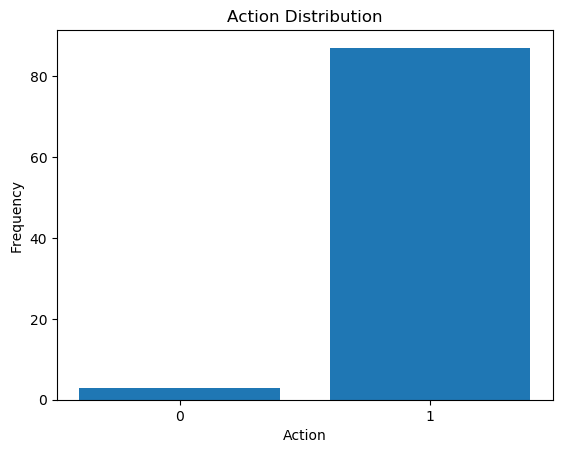

tp: 36
fp: 51
tn: 1
fn: 2


In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Set hyperparameters
gamma = 0.5 # discount factor
epsilon = 0.1 #exploration rate
replay_memory_size = 20000
batch_size = 128
num_episodes = 30
max_steps = 3
learning_rate = 0.44

# Counter initialization: true positives, true negatives, false positives, and false negatives
tp = 0
tn = 0
fp = 0
fn = 0

# hidden_layer_output_train_med contains the output of the hidden layer of the mediator network for all points in training set. 
# y_train_resampled_final contains the corresponding labels of the training set.
D = list(zip(hidden_layer_output_train_med, y_train_resampled_final))

num_features = 10
num_actions = 2 #number of possible actions (either fraud or non-fraud)

# Randomly initialize paramter θ: theta represents the weights and biases of the network.
theta = np.random.randn(num_features, num_actions)

# Initialize replay memory
replay_memory = [replay_memory_size]

# Initialize a list to store the actions taken
actions = []

# Aprroximation Q-function via Neural Network
def Q(state, theta):

    # Set the weights and biases of the network to the values in theta
    agent_network.set_weights(theta)
    
    # Pass the state through the network to get the Q-values for each action
    q_values = agent_network.predict(np.array([state]))
    
    # Return the Q-values as a numpy array
    return q_values

# Policy function: Action selection
def epsilon_greedy_policy(state, epsilon, agent_network):
    if np.random.uniform() < epsilon:
        # Choose a random action
        action = np.random.randint(num_actions)
    else:
        # Choose the action with the highest Q-value
        Q_values = agent_network.predict(state[np.newaxis])[0]
        action = np.argmax(Q_values)
    return action

# Rearding the agent
def reward_fn(action, true_label, predicted_label, lambda_val=0.1):
    # Initialize terminal flag
    terminal = 0
    # Fraud class
    if true_label == 1:
        if action == true_label:
            reward = 1
        else:
            reward = -1
            terminal = 1
    # Not fraud class
    else:
        if action == true_label:
            reward = lambda_val
        else:
            reward = -lambda_val
    return reward, terminal

# Function for computing loss: Compute the mean of the squared difference between the 
# target Q-values and the predicted Q-values for a batch of training samples.
# Target Q-values: Computed using Bellman euqation, Predicted Q-values: Q-values predicted by the Q-network for the current state & action.
def compute_loss(y, Q_values):
    return tf.reduce_mean(tf.square(y - Q_values))

# Start agent training
for episode in range(num_episodes):
    
    # Shuffle the input data
    np.random.shuffle(D)
    
    print("Episode ", episode)
    print("--------------------------------------------")
    
    # Initialize state
    state = hidden_layer_output_train_med[0]
    
    # Start episode
    for step in range(max_steps):
        # Choose action based on epsilon greedy algorithm
        action = epsilon_greedy_policy(state, epsilon, agent_network)
        
        # Append the action to the 'actions' list
        actions.append(action)
        
        # Get true label y_train_resampled_final (This is present in D[step][1])
        true_label = D[step][1]
        
        # Predict label
        predicted_label = action
        
        # Calculate reward and terminal flag
        reward, terminal = reward_fn(action, true_label, predicted_label)
        
        print("Step:", step)
        print("True label is", true_label, ". Agent has predicted:", predicted_label)
        print("Reward:", reward)
        print("")
        
        # Get next state
        next_state = hidden_layer_output_train_med[step+1] if step < max_steps - 1 else state
        
        # Update counters for precision and accuracy
        if true_label == 1:
            if predicted_label == 1:
                tp += 1
            else:
                fn += 1
        else:
            if predicted_label == 1:
                fp += 1
            else:
                tn += 1

        # Store experience in memory
        replay_memory.append((state, action, reward, next_state, terminal))

        # Sample a batch of experiences from memory
        if len(replay_memory) >= batch_size:
            batch = random.sample(replay_memory, batch_size)
            #if all(isinstance(item, tuple) for item in batch): # Check if all items in the batch are tuples
            states, actions, rewards, next_states, terminals = zip(*batch)

            # Convert actions tuple into numpy array
            actions = np.array(actions)
            #else:
                #continue # Skip this iteration if batch contains non-tuple items

            # Compute target Q-values: This code block is necessary to update the Q-network so that 
            # it accurately predicts the Q-values for each state-action pair.
            target_Q_values = []
            for i in range(batch_size):
                
                # if the next state is a terminal state (i.e., the episode is over), then the value of the 
                # state-action pair is simply the immediate reward received.
                if terminals[i]:
                    
                    target_Q_values.append(rewards[i])
                    
                # If the next state is not a terminal state, then the value of the state-action pair is the immediate reward received plus the discounted value of the best action in the next state,
                # which is computed using the deep neural network with the previous set of parameters, denoted as θk-1.
                
                else:
                    next_Q_values = Q(next_states[i], theta)

                    # Update Q-values via the optimal Bellman
                    target_Q_values.append (np.mean(rewards + gamma * np.max(next_Q_values, axis=1)))
            
            # Train the agent_network on the batch of data
            hist = agent_network.train_on_batch(np.array(states), np.array(target_Q_values))
            
            # Compute loss and gradients
            with tf.GradientTape() as tape:
                Q_values = agent_network(states, theta)
                selected_Q_values = tf.reduce_sum(Q_values * tf.one_hot(actions, num_actions), axis=1)
                loss = compute_loss(tf.constant(target_Q_values, dtype=tf.float32), selected_Q_values)
            gradients = tape.gradient(loss, theta)

            # Update parameters theta
            for i in range(len(theta)):
                theta[i].assign_sub(learning_rate * gradients[i])

            # Apply gradients to update weights
            optimizer.apply_gradients(zip(gradients, theta))

            # Clear replay memory
            replay_memory.clear()    
        
        # Update state
        state = next_state
        
        # Check if episode is finished
        if terminal==1:
            break
            
# Calculate precision, recall, F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
F1_score = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", F1_score)

# Plot the distribution of actions
plt.hist(actions, bins=range(num_actions+1), align='left', rwidth=0.8)
plt.xticks(range(num_actions))
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

print("tp:", tp)
print("fp:", fp)
print("tn:", tn)
print("fn:", fn)

In [ ]:
from keras.utils import plot_model
plot_model(agent_network , to_file='a_network .png', show_shapes=True)

In [ ]:
import matplotlib.pyplot as plt

# Define the values for the pie chart
sizes = [44.7,47.4,3.48,4.42]

# Define the labels for each value
labels = ['True label: 1, Prediction:1','True label: 0, Prediction:0', 'True label: 1, Prediction:0', 'True label: 0, Prediction:1']

# Define the colors for each value
colors = ['#ffcc99','#40e0d0','#66b3ff','#ff9999']

# Create the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center of the pie chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Move the legend to the right of the pie chart
ax1.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5))

# Set the title of the pie chart
plt.title("Performance of the Q-Fraud Detection System")

# Show the pie chart
plt.show()

In [ ]:
agent_network.summary()